In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os
from PIL import Image
import imghdr
import numpy as np
from matplotlib import pyplot as plt

In [6]:
data = tf.keras.utils.image_dataset_from_directory(
    'data',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True
)

Found 5418 files belonging to 2 classes.


In [7]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
data = data.map(lambda x, y: (normalization_layer(x), y))

In [8]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

In [11]:
# Plot images
male_images = batch[0][batch[1] == 1][:4]
female_images = batch[0][batch[1] == 0][:4]

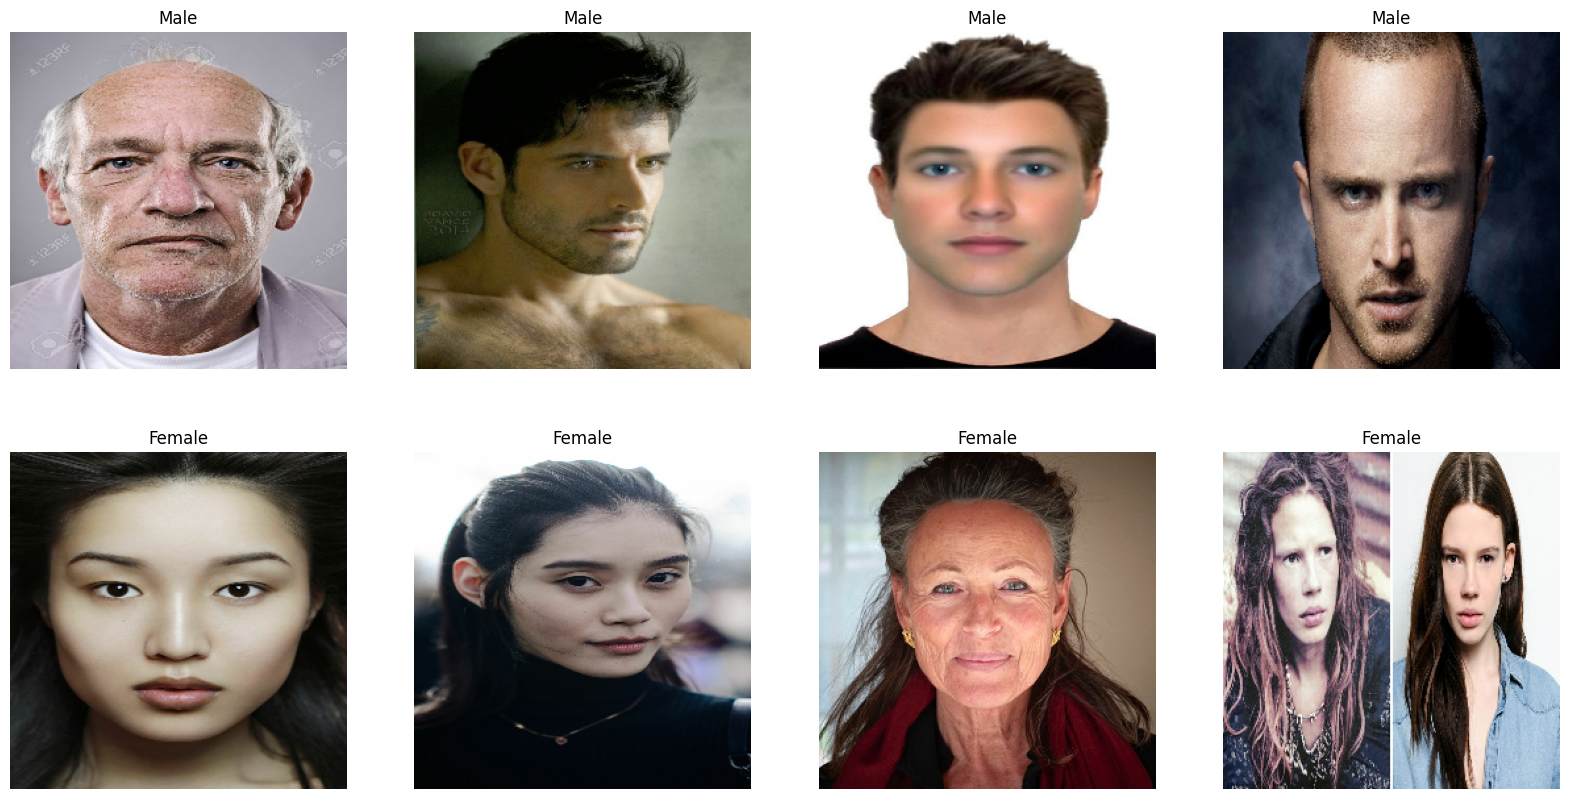

In [13]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for i, img in enumerate(male_images):
    ax[0, i].imshow(img)
    ax[0, i].axis('off') 
    ax[0, i].set_title('Male')

for i, img in enumerate(female_images):
    ax[1, i].imshow(img)
    ax[1, i].axis('off') 
    ax[1, i].set_title('Female')

plt.show()

In [14]:
# Split into tran, val and test sets
train_size = int(len(data)*.8)
val_size = int(len(data)*.1)
test_size = int(len(data)*.1)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [15]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid') # Binary classification
])

/opt/anaconda3/envs/ImageClassification/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy']) # adm better for big dataset and image data

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,839,105 (56.61 MB)

 Trainable params: 14,839,105 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
history = model.fit(
    train,
    validation_data=val,
    epochs=10
)

Epoch 1/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 190s 1s/step - accuracy: 0.6204 - loss: 0.7553 - val_accuracy: 0.8842 - val_loss: 0.2892
Epoch 2/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 208s 2s/step - accuracy: 0.8659 - loss: 0.3211 - val_accuracy: 0.9614 - val_loss: 0.1160
Epoch 3/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 244s 2s/step - accuracy: 0.9523 - loss: 0.1309 - val_accuracy: 0.9688 - val_loss: 0.0879
Epoch 4/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 267s 2s/step - accuracy: 0.9756 - loss: 0.0748 - val_accuracy: 0.9706 - val_loss: 0.0858
Epoch 5/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 306s 2s/step - accuracy: 0.9917 - loss: 0.0374 - val_accuracy: 0.9926 - val_loss: 0.0218
Epoch 6/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 294s 2s/step - accuracy: 0.9917 - loss: 0.0294 - val_accuracy: 0.9871 - val_loss: 0.0423
Epoch 7/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 293s 2s/step - accuracy: 0.9952 - loss: 0.0162 - val_accuracy: 0.9926 - val_loss: 0.0243
Epoch 8/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 298s 2s/step - accuracy: 0.9906 - loss: 0.0279 - val_accu

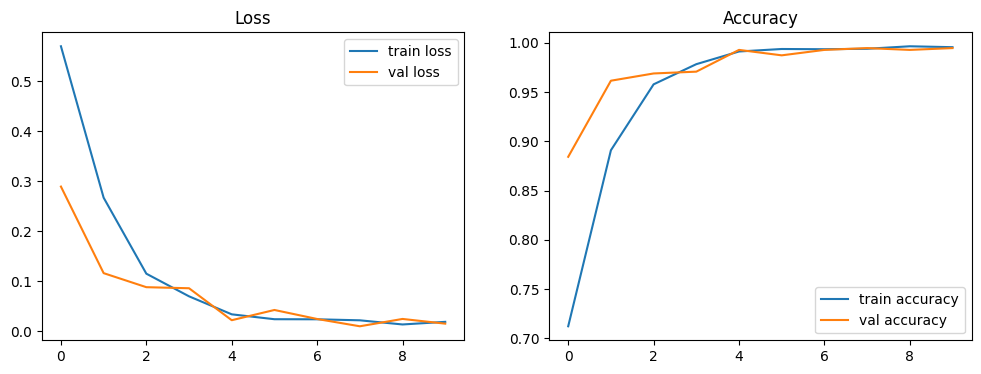

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(history.history['loss'], label='train loss')
ax[0].plot(history.history['val_loss'], label='val loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[1].plot(history.history['accuracy'], label='train accuracy')
ax[1].plot(history.history['val_accuracy'], label='val accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
plt.show()

In [20]:
test_loss, test_accuracy = model.evaluate(test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

17/17 ━━━━━━━━━━━━━━━━━━━━ 39s 538ms/step - accuracy: 0.9874 - loss: 0.0368
Test Loss: 0.049137964844703674
Test Accuracy: 0.9865900278091431


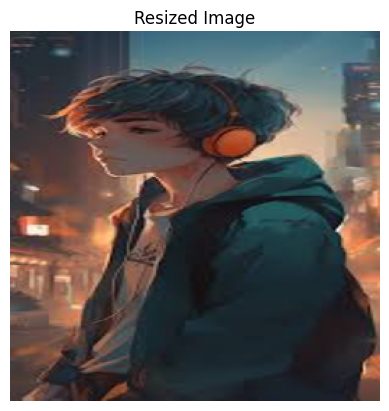

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
[[0.9999523]]
The image is predicted as Male.


In [28]:
# Test
image_path = 'test4.jpg'
img = Image.open(image_path)
img_resized = img.resize((256, 256))

# 显示调整大小后的图像
plt.imshow(img_resized)
plt.axis('off')
plt.title('Resized Image')
plt.show()

# 将图像转换为NumPy数组，并进行归一化处理
img_array = np.array(img_resized) / 255.0

# 添加批次维度
img_array = np.expand_dims(img_array, axis=0)

# 使用模型进行预测
yhat = model.predict(img_array)
print(yhat)

# 确定类别
threshold = 0.5
if yhat >= threshold:
    print("The image is predicted as Male.")
else:
    print("The image is predicted as Female.")

### Save Model

In [29]:
from tensorflow.keras.models import load_model

In [30]:
model.save('gender_detection.h5')